In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import statsmodels.api

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [3]:
os.chdir(r"C:\Users\jadel\Documents\OpenClassrooms\Projet 3")

In [4]:
df_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [5]:
df_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [6]:
print(df_2015.shape)

(3340, 47)


In [7]:
print(df_2016.shape)

(3376, 46)


In [8]:
print(df_2015.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [9]:
df_2015 = df_2015.drop(['Electricity(kWh)', 'OSEBuildingID', 'NaturalGas(therms)', 'NumberofBuildings',
                  'SiteEUIWN(kBtu/sf)','SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                    'SiteEnergyUseWN(kBtu)','TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood','2010 Census Tracts',
       'Seattle Police Department Micro Community Policing Plan Areas','GHGEmissionsIntensity(kgCO2e/ft2)',
       'City Council Districts', 'SPD Beats', 'Zip Codes','LargestPropertyUseTypeGFA',
       'ListOfAllPropertyUseTypes','SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'DefaultData',
       'YearsENERGYSTARCertified', 'Neighborhood','ComplianceStatus', 'Comment', 'PropertyGFATotal'],
                 axis = 1, errors = 'ignore')

In [10]:
df_2015.head()

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,YearBuilt,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),Outlier
0,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,1927,12.0,0,88434,Hotel,65.0,6981428.0,2023032.0,3686160.0,1272388.0,0.0,249.43,NaN
1,2015,NonResidential,Hotel,PARAMOUNT HOTEL,1996,11.0,15064,88502,Hotel,51.0,8354235.0,0.0,3905411.0,4448985.0,0.0,263.51,NaN
2,2015,NonResidential,Hotel,WESTIN HOTEL,1969,41.0,0,961990,Hotel,18.0,73130656.0,19660404.0,49762435.0,3709900.0,0.0,2061.48,NaN
3,2015,NonResidential,Hotel,HOTEL MAX,1926,10.0,0,61320,Hotel,1.0,28229320.0,23458518.0,2769023.0,2001894.0,0.0,1936.34,High Outlier
4,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,1980,18.0,12460,107430,Hotel,67.0,14829099.0,0.0,6066245.0,8763105.0,0.0,507.70,NaN


In [11]:
print(df_2016.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [12]:
df_2016 = df_2016.drop([ 'Address', 'City', 'State', 'ZipCode', 'NumberofBuildings', 'OSEBuildingID',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 
       'Latitude', 'Longitude', 'PropertyGFATotal','ListOfAllPropertyUseTypes',
        'LargestPropertyUseTypeGFA','SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'GHGEmissionsIntensity',
       'SiteEnergyUseWN(kBtu)', 'Electricity(kWh)','NaturalGas(therms)',
        'Comments', 'ComplianceStatus', 'DefaultData'],
                 axis = 1, errors = 'ignore')

In [13]:
df_2015 = df_2015.rename({'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions'},axis = 1)

In [14]:
#concaténation des deux df
df=pd.concat([df_2015, df_2016], ignore_index = True)

In [15]:
df.head()

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,YearBuilt,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,Outlier
0,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,1927,12.0,0,88434,Hotel,65.0,6981428.0,2023032.0,3686160.0,1272388.0,0.0,249.43,NaN
1,2015,NonResidential,Hotel,PARAMOUNT HOTEL,1996,11.0,15064,88502,Hotel,51.0,8354235.0,0.0,3905411.0,4448985.0,0.0,263.51,NaN
2,2015,NonResidential,Hotel,WESTIN HOTEL,1969,41.0,0,961990,Hotel,18.0,73130656.0,19660404.0,49762435.0,3709900.0,0.0,2061.48,NaN
3,2015,NonResidential,Hotel,HOTEL MAX,1926,10.0,0,61320,Hotel,1.0,28229320.0,23458518.0,2769023.0,2001894.0,0.0,1936.34,High Outlier
4,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,1980,18.0,12460,107430,Hotel,67.0,14829099.0,0.0,6066245.0,8763105.0,0.0,507.70,NaN


In [16]:
df.loc[df['TotalGHGEmissions'].isna()]
#Ces lignes ne sont pas exploitables

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,YearBuilt,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,Outlier
62,2015,SPS-District K-12,K-12 School,ARBOR HEIGHTS ELEMENTARY SCHOOL (SPS-DISTRICT),1948,2.0,0,53352,K-12 School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low Outlier
719,2015,SPS-District K-12,K-12 School,MANN (SPS-DISTRICT),1925,2.0,0,37327,K-12 School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,2015,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS,1977,3.0,0,33166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1346,2015,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,1967,4.0,6133,33953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358,2015,SPS-District K-12,K-12 School,PINEHURST ELEMENTARY (SPS-DISTRICT),1950,1.0,0,34005,K-12 School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1360,2015,SPS-District K-12,K-12 School,GENESEE SCHOOL (SPS-DISTRICT),1949,1.0,0,41221,K-12 School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low Outlier
1838,2015,Multifamily LR (1-4),Low-Rise Multifamily,SEAVIEW CONDOMINIUM,1930,3.0,0,53040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2108,2015,SPS-District K-12,K-12 School,WILSON-PACIFIC (SPS-DISTRICT),1953,1.0,0,110830,K-12 School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2381,2015,SPS-District K-12,K-12 School,DECATUR ELEMENTARY (SPS-DISTRICT),1961,1.0,0,43578,K-12 School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2406,2015,NonResidential,Restaurant\n,YALE STREET LANDING,1978,2.0,0,26519,Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#suppression des lignes sans TotaGHGEmissions
df = df.loc[~df['TotalGHGEmissions'].isna()]

In [18]:
df['Outlier'].value_counts()
#114 outliers en tout, nous allons les supprimer

High Outlier    46
Low Outlier     36
Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

In [19]:
#suppression valeurs présentes dans Outliers
df = df.loc[df['Outlier'].isna()]

In [20]:
#suppression de la colonne
df = df.drop(['Outlier'], axis = 1)

In [21]:
#remplace les relevés de consommation par les proportions
df[['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','OtherFuelUse(kBtu)']] = df[['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','OtherFuelUse(kBtu)']].fillna(0)
df['Total'] = df['SteamUse(kBtu)'] +  df['Electricity(kBtu)'] + df['NaturalGas(kBtu)'] + df['OtherFuelUse(kBtu)']
df['SteamUse%'] = ((df['SteamUse(kBtu)']/df['Total'])*100).round(2)
df['Electricity%'] = ((df['Electricity(kBtu)']/df['Total'])*100).round(2)
df['NaturalGas%'] = ((df['NaturalGas(kBtu)']/df['Total'])*100).round(2)
df['OtherFuelUse%'] = ((df['OtherFuelUse(kBtu)']/df['Total'])*100).round(2)

df = df[~(df['Total']==0)]

df = df.drop(['Electricity(kBtu)', 'SteamUse(kBtu)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'Total'], axis = 1, errors = 'ignore')

In [22]:
(df[['OtherFuelUse%']]>0).sum()
#peu de lignes utilisant cette colonne, et les valeurs sont relativement faibles. Nous allons supprimer cette colonne

OtherFuelUse%    16
dtype: int64

In [23]:
df = df.drop(['OtherFuelUse%'], axis =1)

In [24]:
df.isna().sum()

DataYear                     0
BuildingType                 0
PrimaryPropertyType          0
PropertyName                 0
YearBuilt                    0
NumberofFloors               8
PropertyGFAParking           0
PropertyGFABuilding(s)       0
LargestPropertyUseType     142
ENERGYSTARScore           1574
SiteEnergyUse(kBtu)          0
TotalGHGEmissions            0
SteamUse%                    0
Electricity%                 0
NaturalGas%                  0
dtype: int64

In [25]:
#les lignes sans EnergyStarScore ne sont pas exploitables
df = df.dropna(subset = ['ENERGYSTARScore'], axis = 0)

<AxesSubplot:>

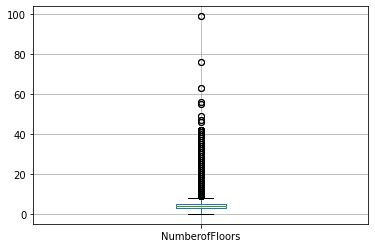

In [26]:
df.boxplot('NumberofFloors')
#Il y a des buildings avec un nombre d'étages = 0 et des buildings >50

In [27]:
df.loc[df['NumberofFloors']>50]
#les deux résultats à 99 étages paraissent aberrantes (worship facility et surface faible) elles sont à supprimer

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,YearBuilt,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SteamUse%,Electricity%,NaturalGas%
235,2015,Nonresidential COS,Large Office,SEATTLE MUNICIPAL TOWER,1990,63.0,159600,1035787,Office,82.0,6.471565e+07,452.16,0.00,99.97,0.03
271,2015,NonResidential,Large Office,WASH MUTUAL TOWER (1201 THIRD AVE),1988,55.0,285000,1115000,Office,94.0,5.162555e+07,569.61,3.73,93.14,3.13
293,2015,NonResidential,Large Office,TWO UNION SQUARE,1989,56.0,389860,1215718,Office,97.0,4.834256e+07,496.99,1.23,93.47,5.30
581,2015,NonResidential,Large Office,COLUMBIA CENTER,1985,76.0,319400,1632820,Office,84.0,9.456009e+07,834.96,0.00,95.97,4.03
1371,2015,NonResidential,Worship Facility,CHINESE BAPTIST CHURCH,1977,99.0,0,21948,Worship Facility,54.0,3.182050e+05,2.22,0.00,100.00,0.00
3573,2016,Nonresidential COS,Large Office,Seattle Municipal Tower (2030),1990,63.0,159600,1195387,Office,89.0,6.157618e+07,429.27,0.00,100.00,0.00
3611,2016,NonResidential,Large Office,1201 Third Avenue,1988,55.0,285000,1115000,Office,92.0,5.307916e+07,588.90,4.11,93.21,2.69
3632,2016,NonResidential,Large Office,Two Union Square,1989,56.0,389860,1215718,Office,97.0,4.951770e+07,525.78,1.85,93.06,5.09
3899,2016,NonResidential,Large Office,Columbia Center - 2015,1985,76.0,319400,1632820,Office,86.0,9.293764e+07,882.56,0.00,94.53,5.47
4699,2016,NonResidential,Worship Facility,Seattle Chinese Baptist Church,1977,99.0,0,21948,Worship Facility,80.0,3.260012e+05,2.27,0.00,100.00,0.00


In [28]:
df = df[~(df['NumberofFloors']==99)]

In [29]:
df[df['NumberofFloors']==0]
#après quelques recherches, nombreux de ces batiments ne sont pas des RDC. Nous allons les compter comme des Nans

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,YearBuilt,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SteamUse%,Electricity%,NaturalGas%
489,2015,NonResidential,Medical Office,1221 MADISON STREET (FORMER ARNOLD MED. PAVILLON),2004,0.0,0,225982,Medical Office,61.0,18558162.00,604.45,36.46,63.54,0.00
490,2015,NonResidential,Mixed Use Property,2200 WESTLAKE,2006,0.0,0,516407,Parking,19.0,48981052.00,1222.69,0.00,61.01,38.99
3827,2016,NonResidential,Medical Office,Arnold Pavilion,2004,0.0,0,225982,Medical Office,53.0,20560622.00,692.12,38.01,61.99,0.00
3828,2016,NonResidential,Mixed Use Property,2200 Westlake - SEDO,2006,0.0,0,516407,Parking,31.0,39403320.00,734.72,0.00,74.70,25.30
5094,2016,NonResidential,Medical Office,HART First Hill LLC,1945,0.0,0,274568,Medical Office,52.0,25311526.00,1110.07,52.53,47.47,0.00
6470,2016,NonResidential,Warehouse,Sandpoint #5,1940,0.0,0,384772,Non-Refrigerated Warehouse,69.0,15206762.00,391.70,0.00,59.28,40.72
6471,2016,NonResidential,Medical Office,Sandpoint #25,1960,0.0,0,30287,Medical Office,32.0,2193115.00,32.72,0.00,82.78,17.22
6472,2016,NonResidential,Small- and Mid-Sized Office,Sandpoint #29,1960,0.0,0,21931,Office,32.0,3947209.25,145.11,0.00,35.43,64.57
6616,2016,NonResidential,Residence Hall,Cedar Hall,2011,0.0,0,176225,Residence Hall/Dormitory,91.0,4926695.00,103.65,0.00,69.51,30.49
6618,2016,NonResidential,Residence Hall,Lander Hall,1953,0.0,0,166991,Residence Hall/Dormitory,19.0,15965859.00,437.20,0.00,55.76,44.24


In [30]:
#on remplace ces valeurs aberrantes par des nans
df['NumberofFloors'] = df['NumberofFloors'].replace([0],[np.nan])

In [31]:
#calcul de la surface moyenne d'un étage pour estimer le nombre d'étages des valeurs manquantes
#puis division de la surface totale par cette constante
floor_mean_surface = (df['PropertyGFABuilding(s)'] / df['NumberofFloors']).mean()
df['NumberofFloors'] = df['NumberofFloors'].fillna(df['PropertyGFABuilding(s)']/floor_mean_surface).round()

In [32]:
#aucune valeur cible = 0
(df['SiteEnergyUse(kBtu)']==0).sum()

0

<AxesSubplot:>

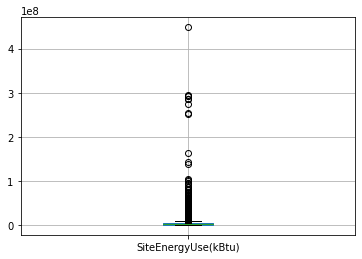

In [33]:
#valeur > 2e8 à vérifier
df.boxplot('SiteEnergyUse(kBtu)')

In [34]:
df[df['SiteEnergyUse(kBtu)']>2e8]
#beaucoup d'hopitaux et the westin building semblent correctes.
#Une usine de production de boeing en cours de destruction à supprimer.

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,YearBuilt,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SteamUse%,Electricity%,NaturalGas%
123,2015,NonResidential,Hospital,SEATTLE CHILDREN'S HOSPITAL (MAIN CAMPUS),1953,10.0,0,879000,Hospital (General Medical & Surgical),13.0,251191824.0,8046.70,0.00,45.68,54.32
170,2015,NonResidential,Hospital,HARBORVIEW MEDICAL CENTER,2000,8.0,0,1158691,Hospital (General Medical & Surgical),30.0,295812640.0,10780.64,41.48,57.77,0.75
560,2015,NonResidential,Other,THE WESTIN BUILDING,1981,33.0,0,429405,Data Center,71.0,284867168.0,1992.96,0.00,99.95,0.05
621,2015,NonResidential,Hospital,SWEDISH HOSPITAL MEDICAL CENTER First Hill Campus,1994,14.0,0,1765970,Hospital (General Medical & Surgical),59.0,286685536.0,11824.89,44.60,48.99,6.41
3375,2016,Campus,Mixed Use Property,Plant 2 Site,1992,3.0,0,494835,Office,8.0,448385312.0,16870.98,0.00,33.56,66.44
3464,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,1953,10.0,0,879000,Hospital (General Medical & Surgical),10.0,253832464.0,8145.52,0.00,45.56,54.44
3510,2016,NonResidential,Hospital,Harborview Medical Center,2000,8.0,0,1158691,Hospital (General Medical & Surgical),29.0,293090784.0,10734.57,41.82,57.55,0.63
3898,2016,NonResidential,Other,WestinBuilding,1981,33.0,0,429405,Data Center,98.0,274682208.0,1921.82,0.00,99.95,0.05
3958,2016,NonResidential,Hospital,Swedish First Hill,1994,14.0,0,1765970,Hospital (General Medical & Surgical),54.0,291614432.0,12307.16,46.27,47.79,5.94


In [35]:
#suppression de l'usine désaffectuée
df = df.loc[df['SiteEnergyUse(kBtu)']<4e8]

In [36]:
df['TotalGHGEmissions'].median()

31.58

<AxesSubplot:>

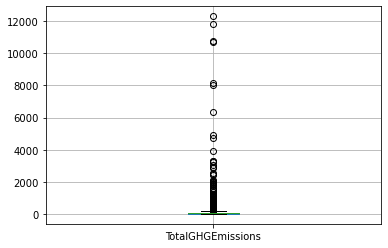

In [37]:
df.boxplot('TotalGHGEmissions')
#pas d'outliers significatif, mais on ne voit pas la boîte

(0.0, 2.0, 0.0, 500.0)

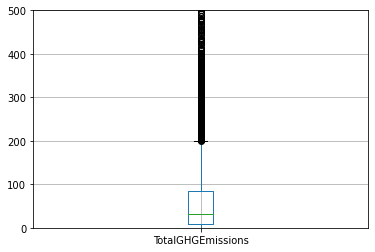

In [38]:
#zoom sur la boîte
df.boxplot('TotalGHGEmissions')
plt.axis([0,2,0,500])

<AxesSubplot:>

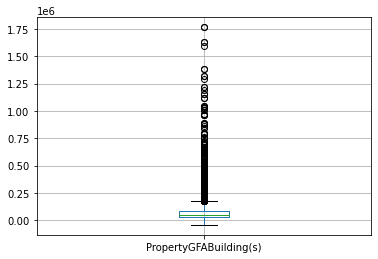

In [39]:
df.boxplot('PropertyGFABuilding(s)')
#valeurs négatives à vérifier

In [40]:
#lignes à modifier signe négatif à enlever
df.loc[df['PropertyGFABuilding(s)']<0, :]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,YearBuilt,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SteamUse%,Electricity%,NaturalGas%
3139,2015,NonResidential,Small- and Mid-Sized Office,QUEEN ANNE SQUARE WEST (2013),1982,5.0,97325,-43310,Office,65.0,3455247.0,24.09,0.0,100.0,0.0


In [41]:
df.loc[df['PropertyGFABuilding(s)']<0, 'PropertyGFABuilding(s)'] = -df.loc[df['PropertyGFABuilding(s)']<0, 'PropertyGFABuilding(s)']

<AxesSubplot:>

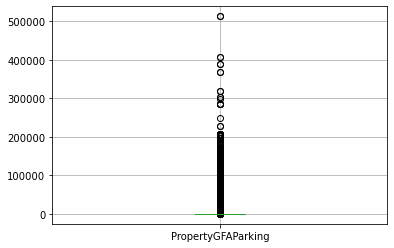

In [42]:
df.boxplot('PropertyGFAParking')
#valeurs négatives à vérifier

In [43]:
df.loc[df['PropertyGFAParking']<0, 'PropertyGFAParking']

2428   -3
3136   -2
Name: PropertyGFAParking, dtype: int64

In [44]:
df['PropertyGFAParking'] = df['PropertyGFAParking'].apply(lambda x: 0 if x<0 else x)

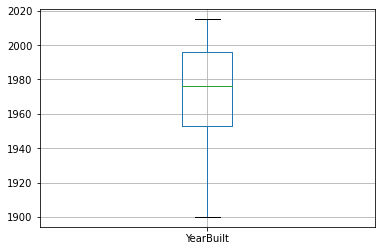

In [45]:
df.boxplot('YearBuilt');
#aucune valeur aberrante

In [46]:
df['LargestPropertyUseType'].value_counts()
#trop de valeurs, on va garder celles avec une occurence >=10 et mettre le reste en other

Multifamily Housing                      2719
Office                                    792
Non-Refrigerated Warehouse                289
K-12 School                               251
Retail Store                              156
Hotel                                     134
Worship Facility                          125
Distribution Center                        81
Senior Care Community                      81
Medical Office                             76
Supermarket/Grocery Store                  71
Residence Hall/Dormitory                   34
Hospital (General Medical & Surgical)      19
Parking                                    13
Refrigerated Warehouse                     10
Bank Branch                                 8
Financial Office                            7
Data Center                                 4
Wholesale Club/Supercenter                  2
Courthouse                                  2
Other                                       2
Self-Storage Facility             

In [47]:
df['LargestPropertyUseType'].value_counts().index

Index(['Multifamily Housing', 'Office', 'Non-Refrigerated Warehouse',
       'K-12 School', 'Retail Store', 'Hotel', 'Worship Facility',
       'Distribution Center', 'Senior Care Community', 'Medical Office',
       'Supermarket/Grocery Store', 'Residence Hall/Dormitory',
       'Hospital (General Medical & Surgical)', 'Parking',
       'Refrigerated Warehouse', 'Bank Branch', 'Financial Office',
       'Data Center', 'Wholesale Club/Supercenter', 'Courthouse', 'Other',
       'Self-Storage Facility', 'Other - Public Services',
       'Manufacturing/Industrial Plant', 'Laboratory',
       'Other - Restaurant/Bar'],
      dtype='object')

In [48]:
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].replace([np.nan, 'Bank Branch', 'Financial Office',
       'Data Center', 'Wholesale Club/Supercenter', 'Courthouse', 'Other',
       'Manufacturing/Industrial Plant', 'Other - Restaurant/Bar',
       'Laboratory', 'Other - Public Services', 'Self-Storage Facility'], 'Other')

In [49]:
df.PrimaryPropertyType.value_counts()
#valeurs à remplacer

Low-Rise Multifamily           1683
Mid-Rise Multifamily            890
Small- and Mid-Sized Office     477
Large Office                    314
K-12 School                     251
High-Rise Multifamily           182
Retail Store                    161
Non-Refrigerated Warehouse      146
Warehouse                       143
Hotel                           141
Worship Facility                127
Senior Care Community            81
Medical Office                   78
Mixed Use Property               72
Distribution Center              42
Distribution Center\n            39
Supermarket / Grocery Store      38
Supermarket/Grocery Store        35
Other                            23
Residence Hall                   21
Hospital                         20
Residence Hall/Dormitory         13
Refrigerated Warehouse           10
SPS-District K-12                 4
Office                            3
Self-Storage Facility\n           1
Name: PrimaryPropertyType, dtype: int64

In [50]:
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].replace(['Distribution Center\n','Supermarket / Grocery Store',
                                   'Self-Storage Facility\n','Restaurant\n'],
                                  ['Distribution Center','Supermarket/Grocery Store',
                                   'Self-Storage Facility','Restaurant'])

In [51]:
df['PrimaryPropertyType'].value_counts()
#on ne va garder que les occurences >= 20

Low-Rise Multifamily           1683
Mid-Rise Multifamily            890
Small- and Mid-Sized Office     477
Large Office                    314
K-12 School                     251
High-Rise Multifamily           182
Retail Store                    161
Non-Refrigerated Warehouse      146
Warehouse                       143
Hotel                           141
Worship Facility                127
Distribution Center              81
Senior Care Community            81
Medical Office                   78
Supermarket/Grocery Store        73
Mixed Use Property               72
Other                            23
Residence Hall                   21
Hospital                         20
Residence Hall/Dormitory         13
Refrigerated Warehouse           10
SPS-District K-12                 4
Office                            3
Self-Storage Facility             1
Name: PrimaryPropertyType, dtype: int64

In [52]:
df['PrimaryPropertyType'].value_counts().index

Index(['Low-Rise Multifamily', 'Mid-Rise Multifamily',
       'Small- and Mid-Sized Office', 'Large Office', 'K-12 School',
       'High-Rise Multifamily', 'Retail Store', 'Non-Refrigerated Warehouse',
       'Warehouse', 'Hotel', 'Worship Facility', 'Distribution Center',
       'Senior Care Community', 'Medical Office', 'Supermarket/Grocery Store',
       'Mixed Use Property', 'Other', 'Residence Hall', 'Hospital',
       'Residence Hall/Dormitory', 'Refrigerated Warehouse',
       'SPS-District K-12', 'Office', 'Self-Storage Facility'],
      dtype='object')

In [53]:
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].replace([
       'Residence Hall/Dormitory', 'Refrigerated Warehouse',
       'SPS-District K-12', 'Office', 'Self-Storage Facility'], 'Other')

In [54]:
df.BuildingType.value_counts()
#distribution convenable des buildingtype

NonResidential          1970
Multifamily LR (1-4)    1724
Multifamily MR (5-9)     912
Multifamily HR (10+)     189
SPS-District K-12        172
Nonresidential COS        20
Campus                     8
Name: BuildingType, dtype: int64

In [55]:
df.isna().sum().sum()
#pas de nans

0

In [56]:
#nettoyage terminé, suppression de la colonne PropertyName et réorganisation des colonnes 
df = df[['DataYear', 'YearBuilt', 'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
        'BuildingType', 'PrimaryPropertyType','LargestPropertyUseType', 'ENERGYSTARScore', 
        'SteamUse%', 'Electricity%','NaturalGas%',
        'TotalGHGEmissions', 'SiteEnergyUse(kBtu)']]

''

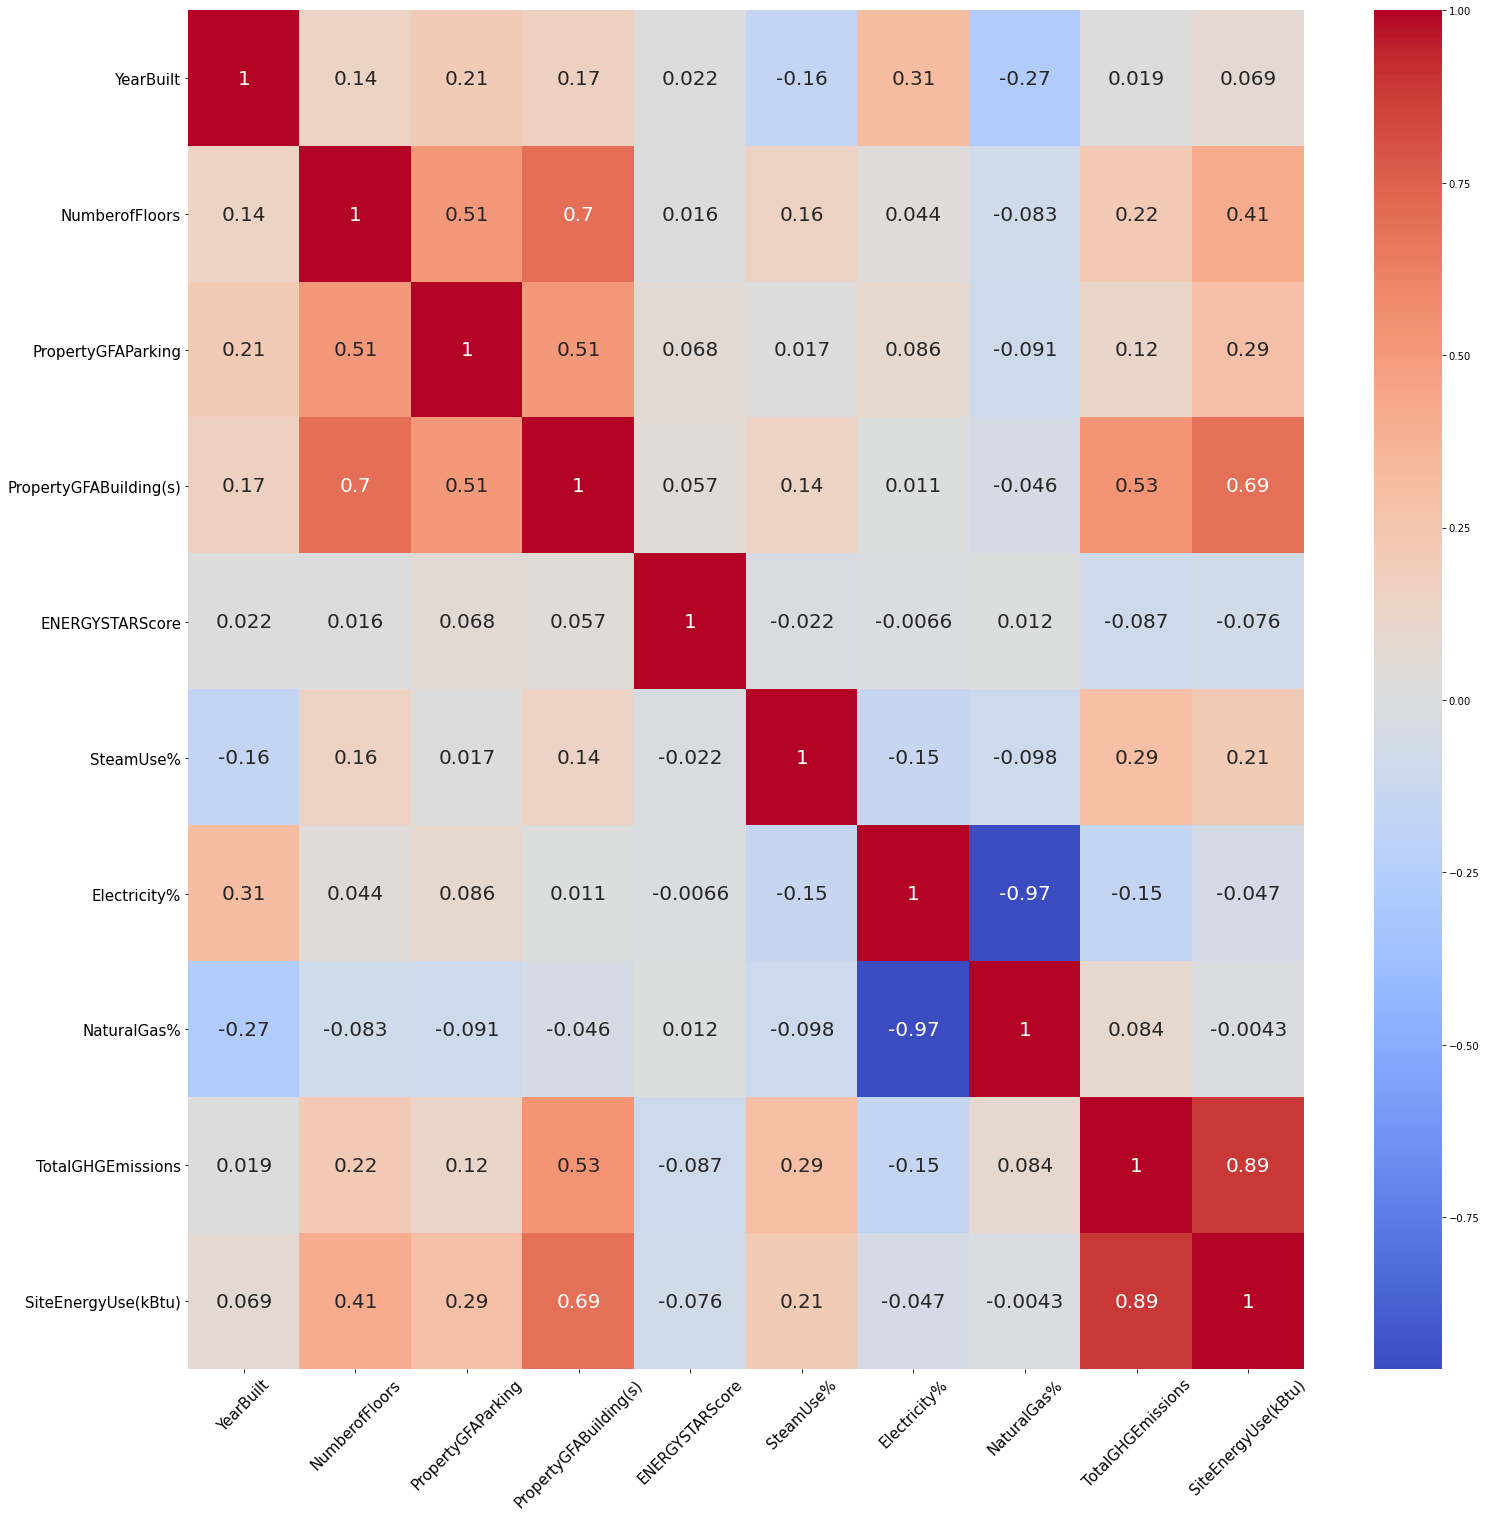

In [57]:
cor = df.drop(['DataYear'], axis =1).corr()

fig, ax = plt.subplots(figsize=(25,25))
corr_map = sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm', annot_kws={"size": 20})
corr_map.set_xticklabels(corr_map.get_xmajorticklabels(), fontsize = 15, rotation = 45)
corr_map.set_yticklabels(corr_map.get_ymajorticklabels(), fontsize = 15, rotation =0)
;

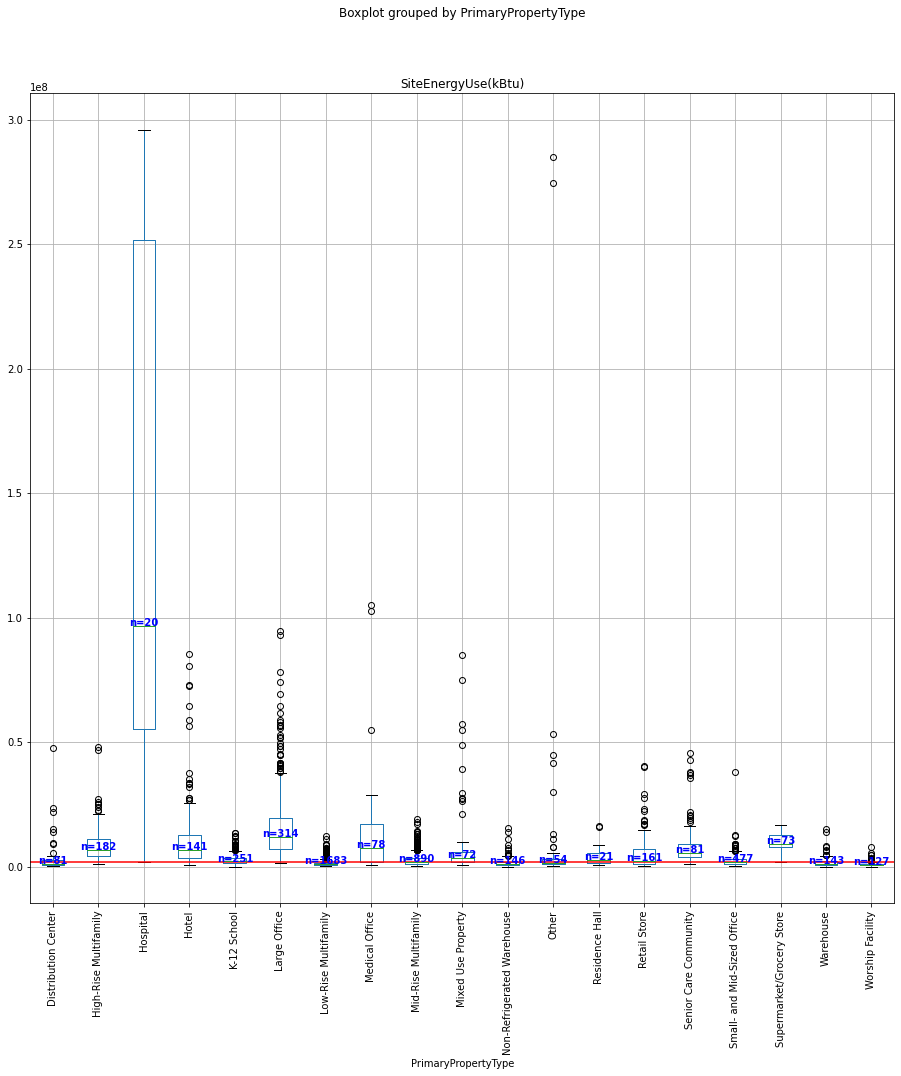

In [58]:
medians = df.groupby(['PrimaryPropertyType'])['SiteEnergyUse(kBtu)'].median().values
n = df['PrimaryPropertyType'].value_counts().sort_index()
n = [str(x) for x in n.tolist()]
n = ["n=" + i for i in n]

ax = df.boxplot(column = 'SiteEnergyUse(kBtu)', by = 'PrimaryPropertyType', figsize = (15,15))
plt.xticks(rotation =90)
plt.axhline(y=df['SiteEnergyUse(kBtu)'].median(), color='r', linestyle='-')

pos = range(len(n))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick]+1,
            medians[tick]+2,
            n[tick],
            horizontalalignment='center',
            size='10',
            color='b',
            weight='semibold')

plt.show()
#consommation plus élevée dans certains secteurs comme le secteur médical, l'éducation, accomodation et restaurants.

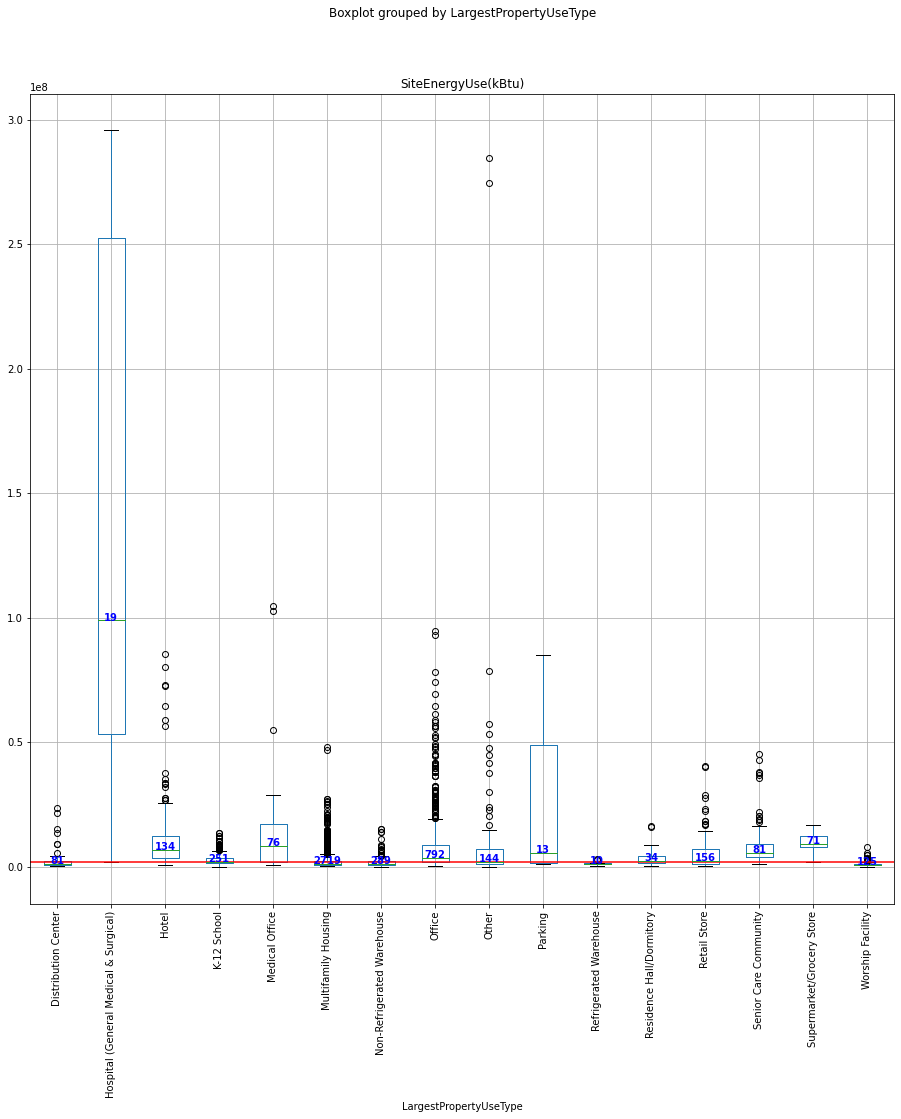

In [59]:
medians = df.groupby(['LargestPropertyUseType'])['SiteEnergyUse(kBtu)'].median().values
n = df['LargestPropertyUseType'].value_counts().sort_index()
n = [str(x) for x in n.tolist()]
n = ["" + i for i in n]

ax = df.boxplot(column = 'SiteEnergyUse(kBtu)', by = 'LargestPropertyUseType', figsize = (15,15))
plt.xticks(rotation =90)
plt.axhline(y=df['SiteEnergyUse(kBtu)'].median(), color='r', linestyle='-')

pos = range(len(n))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick]+1,
            medians[tick]+2,
            n[tick],
            horizontalalignment='center',
            size='10',
            color='b',
            weight='semibold');
#consommation plus élevée dans certains secteurs comme le secteur médical, l'éducation, accomodation et restaurants.

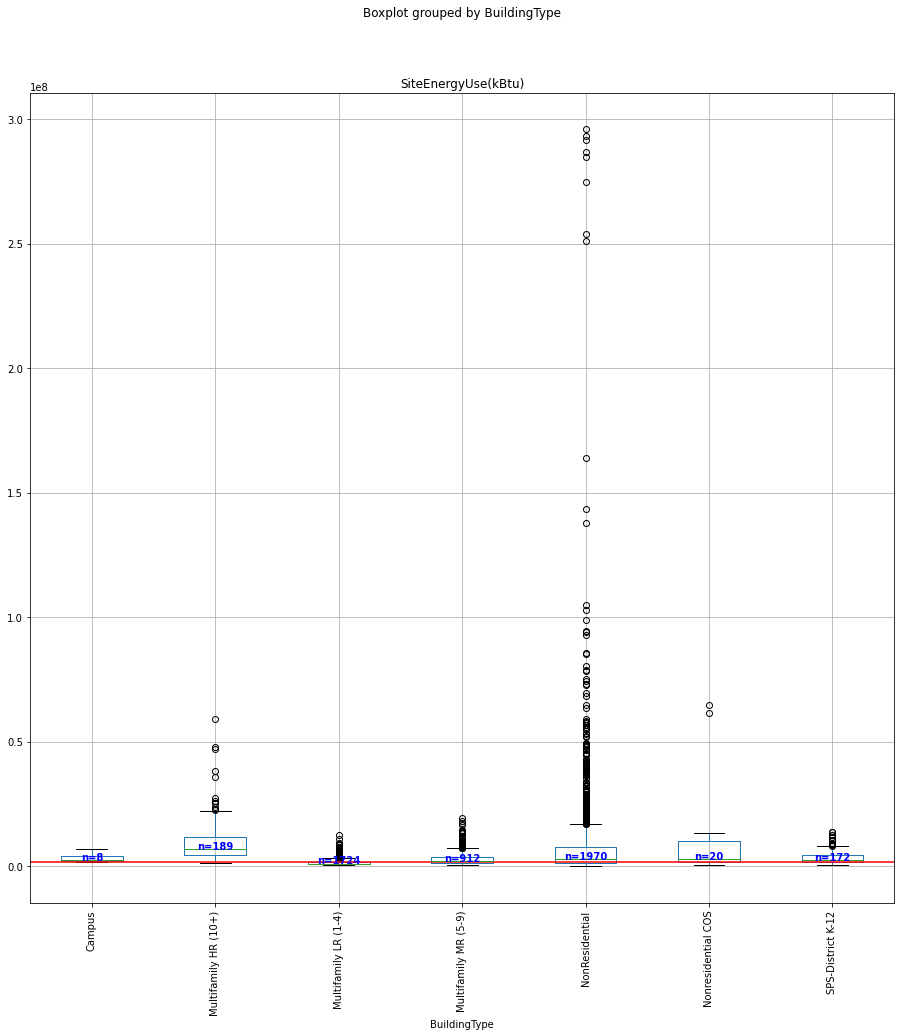

In [60]:
medians = df.groupby(['BuildingType'])['SiteEnergyUse(kBtu)'].median().values
n = df['BuildingType'].value_counts().sort_index()
n = [str(x) for x in n.tolist()]
n = ["n=" + i for i in n]

ax = df.boxplot(column = 'SiteEnergyUse(kBtu)', by = 'BuildingType', figsize = (15,15))
plt.xticks(rotation =90)
plt.axhline(y=df['SiteEnergyUse(kBtu)'].median(), color='r', linestyle='-')

pos = range(len(n))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick]+1,
            medians[tick]+2,
            n[tick],
            horizontalalignment='center',
            size='10',
            color='b',
            weight='semibold');

In [61]:
result = statsmodels.formula.api.ols("Q('SiteEnergyUse(kBtu)') ~ PrimaryPropertyType", data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
print("Tableau ANOVA de la corrélation PrimaryPropertyType et Consommation d'énergie")
table

Tableau ANOVA de la corrélation PrimaryPropertyType et Consommation d'énergie


,df,sum_sq,mean_sq,F,PR(>F)
PrimaryPropertyType,18.0,4.487361e+17,2.492978e+16,224.283596,0.0
Residual,4976.0,5.530971e+17,1.111529e+14,NaN,NaN


In [62]:
result = statsmodels.formula.api.ols("Q('SiteEnergyUse(kBtu)') ~ LargestPropertyUseType", data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
print("Tableau ANOVA de la corrélation LargestPropertyUseType et Consommation d'énergie")
table

Tableau ANOVA de la corrélation LargestPropertyUseType et Consommation d'énergie


,df,sum_sq,mean_sq,F,PR(>F)
LargestPropertyUseType,15.0,3.991456e+17,2.660971e+16,219.831524,0.0
Residual,4979.0,6.026876e+17,1.210459e+14,NaN,NaN


In [63]:
result = statsmodels.formula.api.ols("Q('SiteEnergyUse(kBtu)') ~ BuildingType", data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
print("Tableau ANOVA de la corrélation BuildingType et Consommation d'énergie")
table

Tableau ANOVA de la corrélation BuildingType et Consommation d'énergie


,df,sum_sq,mean_sq,F,PR(>F)
BuildingType,6.0,5.221846e+16,8.703076e+15,45.714269,8.979104e-55
Residual,4988.0,9.496147e+17,1.903799e+14,NaN,NaN


In [64]:
result = statsmodels.formula.api.ols("Q('TotalGHGEmissions') ~ PrimaryPropertyType", data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
print("Tableau ANOVA de la corrélation PrimaryPropertyType et Consommation d'énergie")
table

Tableau ANOVA de la corrélation PrimaryPropertyType et Consommation d'énergie


,df,sum_sq,mean_sq,F,PR(>F)
PrimaryPropertyType,18.0,4.938269e+08,2.743483e+07,306.120552,0.0
Residual,4976.0,4.459540e+08,8.962099e+04,NaN,NaN


In [65]:
result = statsmodels.formula.api.ols("Q('TotalGHGEmissions') ~ LargestPropertyUseType", data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
print("Tableau ANOVA de la corrélation LargestPropertyUseType et Consommation d'énergie")
table

Tableau ANOVA de la corrélation LargestPropertyUseType et Consommation d'énergie


,df,sum_sq,mean_sq,F,PR(>F)
LargestPropertyUseType,15.0,4.689013e+08,3.126009e+07,330.538797,0.0
Residual,4979.0,4.708796e+08,9.457312e+04,NaN,NaN


In [66]:
result = statsmodels.formula.api.ols("Q('TotalGHGEmissions') ~ BuildingType", data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
print("Tableau ANOVA de la corrélation BuildingType et Consommation d'énergie")
table

Tableau ANOVA de la corrélation BuildingType et Consommation d'énergie


,df,sum_sq,mean_sq,F,PR(>F)
BuildingType,6.0,2.545659e+07,4.242765e+06,23.14596,4.236639e-27
Residual,4988.0,9.143243e+08,1.833048e+05,NaN,NaN


In [67]:
def log_trans(x):
    return np.log(x+1)

''

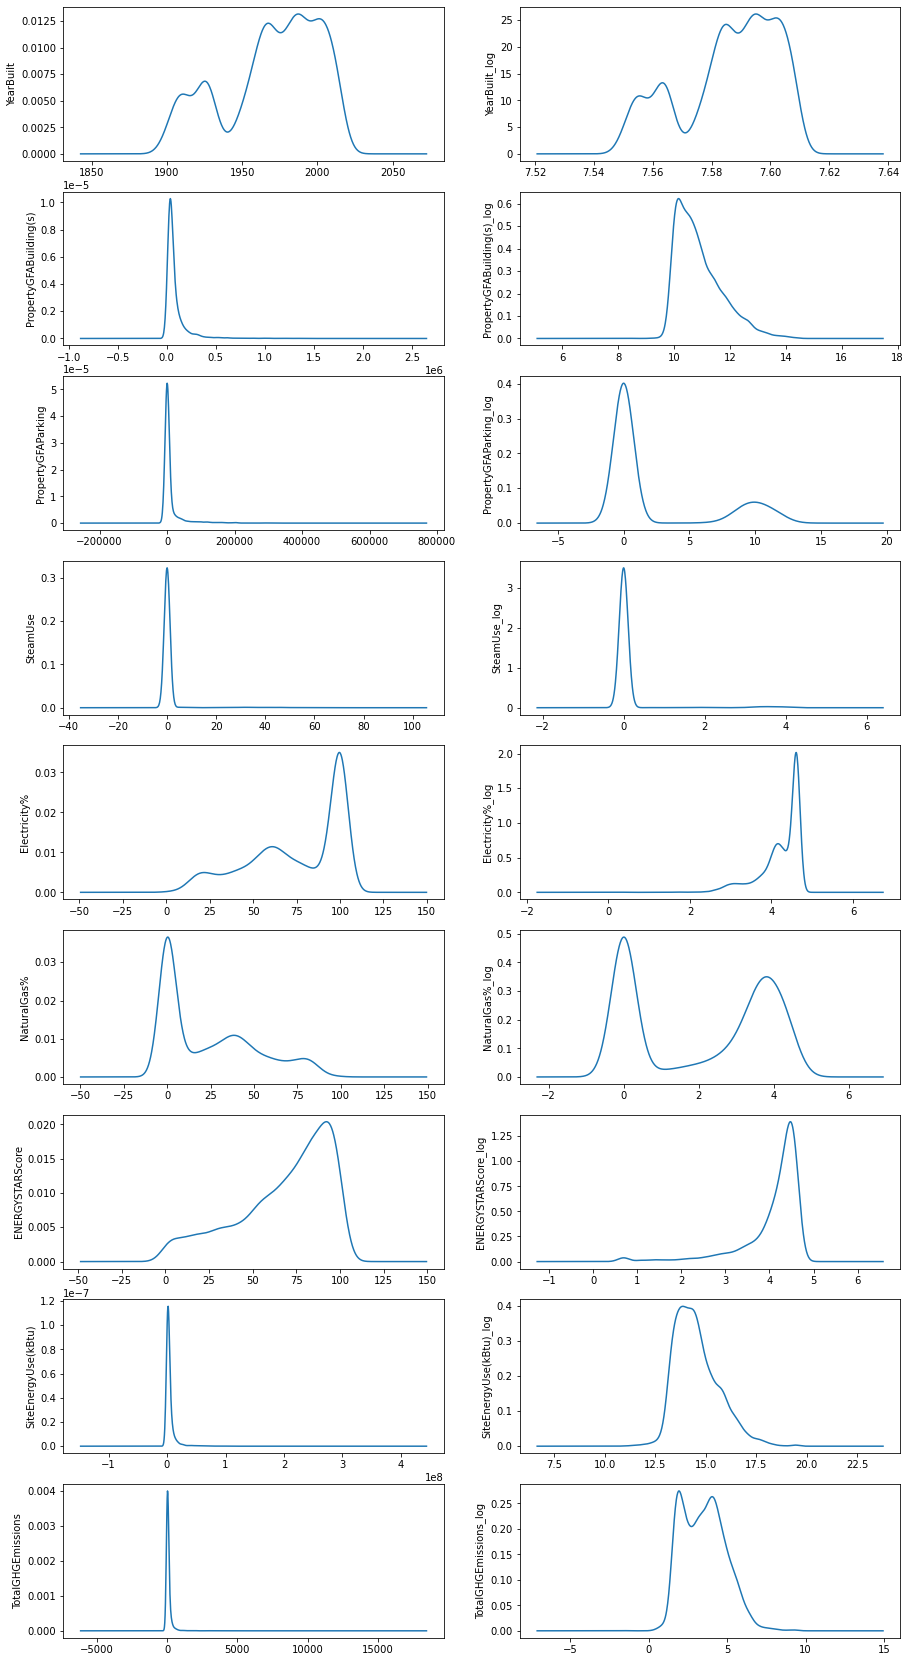

In [68]:
#graphes des log_trans sur toutes les données numériques

fig, axes = plt.subplots(9, 2, figsize = (15,30))
df['YearBuilt'].plot.kde(ax = axes[0,0])
df['YearBuilt'].apply(log_trans).plot.kde(ax = axes[0,1])
df['PropertyGFABuilding(s)'].plot.kde(ax = axes[1,0])
df['PropertyGFABuilding(s)'].apply(log_trans).plot.kde(ax = axes[1,1])
df['PropertyGFAParking'].plot.kde(ax = axes[2,0])
df['PropertyGFAParking'].apply(log_trans).plot.kde(ax = axes[2,1])
df['SteamUse%'].plot.kde(ax = axes[3,0])
df['SteamUse%'].apply(log_trans).plot.kde(ax = axes[3,1])
df['Electricity%'].plot.kde(ax = axes[4,0])
df['Electricity%'].apply(log_trans).plot.kde(ax = axes[4,1])
df['NaturalGas%'].plot.kde(ax = axes[5,0])
df['NaturalGas%'].apply(log_trans).plot.kde(ax = axes[5,1])
df['ENERGYSTARScore'].plot.kde(ax = axes[6,0])
df['ENERGYSTARScore'].apply(log_trans).plot.kde(ax = axes[6,1])
df['SiteEnergyUse(kBtu)'].plot.kde(ax = axes[7,0])
df['SiteEnergyUse(kBtu)'].apply(log_trans).plot.kde(ax = axes[7,1])
df['TotalGHGEmissions'].plot.kde(ax = axes[8,0])
df['TotalGHGEmissions'].apply(log_trans).plot.kde(ax = axes[8,1])
axes[0,0].set_ylabel('YearBuilt')
axes[0,1].set_ylabel('YearBuilt_log')
axes[1,0].set_ylabel('PropertyGFABuilding(s)')
axes[1,1].set_ylabel('PropertyGFABuilding(s)_log')
axes[2,0].set_ylabel('PropertyGFAParking')
axes[2,1].set_ylabel('PropertyGFAParking_log')
axes[3,0].set_ylabel('SteamUse')
axes[3,1].set_ylabel('SteamUse_log')
axes[4,0].set_ylabel('Electricity%')
axes[4,1].set_ylabel('Electricity%_log')
axes[5,0].set_ylabel('NaturalGas%')
axes[5,1].set_ylabel('NaturalGas%_log')
axes[6,0].set_ylabel('ENERGYSTARScore')
axes[6,1].set_ylabel('ENERGYSTARScore_log')
axes[7,0].set_ylabel('SiteEnergyUse(kBtu)')
axes[7,1].set_ylabel('SiteEnergyUse(kBtu)_log')
axes[8,0].set_ylabel('TotalGHGEmissions')
axes[8,1].set_ylabel('TotalGHGEmissions_log')
;
#PropertyGFABuilding, PropertyGFAParking, SteamUse et les variables cibles présentent un intérêt de log transformation

In [69]:
df['PropertyGFAParking'] = df['PropertyGFAParking'].apply(log_trans)
df['SteamUse%'] = df['SteamUse%'].apply(log_trans)
df['PropertyGFABuilding(s)'] = df['PropertyGFABuilding(s)'].apply(log_trans)
df['SiteEnergyUse(kBtu)'] = df['SiteEnergyUse(kBtu)'].apply(log_trans)
df['TotalGHGEmissions'] = df['TotalGHGEmissions'].apply(log_trans)

In [70]:
df.shape

(4995, 14)

In [71]:
df.to_csv('consommation_seattle.csv', index = False)